## Filter spam from a collection of emails using Naive Bayes

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Create the Data.


In [4]:
data = {
    'label': ['spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam',
              'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham'],
    'email': [
        'Win a $1000 Walmart gift card! Click here to claim now!',
        'Hey, are you coming to the party tonight?',
        'Congratulations! You have won a free vacation to the Bahamas!',
        'Can we reschedule our meeting to 3 PM?',
        'Your Amazon order has been shipped.',
        'You have been selected for a cash prize! Call now to claim.',
        'Urgent! Your account has been compromised, please reset your password.',
        'Don’t forget about the doctor’s appointment tomorrow.',
        'Your package is out for delivery.',
        'Get rich quick by investing in this opportunity. Don’t miss out!',
        'Can you send me the latest project report?',
        'Exclusive offer! Buy one, get one free on all items.',
        'Are you free for lunch tomorrow?',
        'Claim your free iPhone now by clicking this link!',
        'I’ll call you back in 5 minutes.',
        'Get a $500 loan approved instantly. No credit check required!',
        'Hurry! Limited-time offer, act now to win a $1000 gift card.',
        'Let’s catch up over coffee this weekend.',
        'You’ve been pre-approved for a personal loan. Apply today!',
        'Meeting reminder for Monday at 10 AM.'
    ]
}

data_df = pd.DataFrame(data)

In [5]:
data_df.head()

,label,email
0,spam,Win a $1000 Walmart gift card! Click here to c...
1,ham,"Hey, are you coming to the party tonight?"
2,spam,Congratulations! You have won a free vacation ...
3,ham,Can we reschedule our meeting to 3 PM?
4,ham,Your Amazon order has been shipped.


### Step 2: Preprocessing, Convert label (spam = 1, ham = 0)


In [6]:
data_df['label'] = data_df['label'].map({'ham': 0, 'spam': 1})

In [7]:
data_df.head()

,label,email
0,1,Win a $1000 Walmart gift card! Click here to c...
1,0,"Hey, are you coming to the party tonight?"
2,1,Congratulations! You have won a free vacation ...
3,0,Can we reschedule our meeting to 3 PM?
4,0,Your Amazon order has been shipped.


### Step 3: Convert the text data into vectors using CountVectorizer


In [9]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_df['email']) # Convert the text into a bag of words matrix.

In [10]:
print("Vocabulary:\n", vectorizer.get_feature_names_out())


Vocabulary:
 ['10' '1000' '500' 'account' 'act' 'amazon' 'apply' 'appointment'
 'approved' 'bahamas' 'buy' 'card' 'cash' 'catch' 'check' 'claim' 'click'
 'clicking' 'coffee' 'coming' 'compromised' 'congratulations' 'credit'
 'delivery' 'doctor' 'don' 'exclusive' 'forget' 'free' 'gift' 'hey'
 'hurry' 'instantly' 'investing' 'iphone' 'items' 'latest' 'let' 'limited'
 'link' 'll' 'loan' 'lunch' 'meeting' 'minutes' 'miss' 'monday' 'offer'
 'opportunity' 'order' 'package' 'party' 'password' 'personal' 'pm' 'pre'
 'prize' 'project' 'quick' 'reminder' 'report' 'required' 'reschedule'
 'reset' 'rich' 'selected' 'send' 'shipped' 'time' 'today' 'tomorrow'
 'tonight' 'urgent' 'vacation' 've' 'walmart' 'weekend' 'win' 'won']


In [11]:
print("Count Matrix\n", X.toarray())

Count Matrix
 [[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


### Step 4: Split the data. We will split into 80-20 ratio.


In [13]:
# Training (80%) and Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, data_df['label'], test_size=0.2, random_state=42)

### Step 5: Create and Train Model


In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Step 6: Make Prediction and Evaluate

In [17]:
predictions = model.predict(X_val)
accuracy_score = accuracy_score(y_val, predictions)
print("Accuracy Score:\n", accuracy_score)
confusion_matrix = confusion_matrix(y_val, predictions)
print("\nConfusion Matrix:\n", confusion_matrix)

Accuracy Score:
 1.0

Confusion Matrix:
 [[2 0]
 [0 2]]


### Step 7: Visualization.

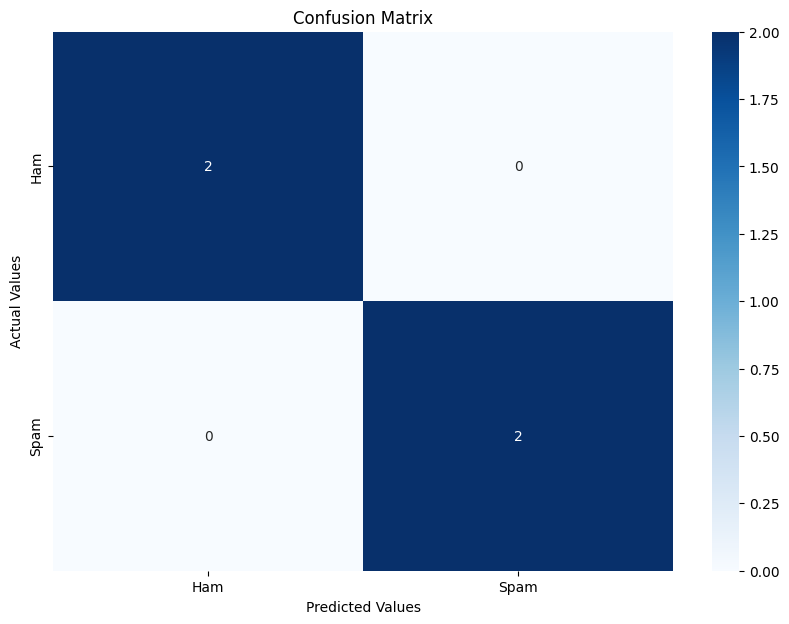

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()